In [ ]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



In [ ]:

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [ ]:

file_url = r'C:\Users\Lenovo\Documents\INDE DATA\MERGEVALUEFOODHOUSEHOLDNSS68.csv'
merge= pd.read_csv(file_url)
#We make a copy of the file and work on it
merge= merge.copy()
merge.head(2)

# A. Encoding 

In [38]:
merge.dtypes


HHID                                      int64
Sector                                   object
HH_Size                                   int64
Religion                                 object
Social_Group                             object
whether_Land_owned                       object
State_code                               object
Regular_salary_earner                    object
Possess_ration_card                      object
MPCE_MRP                                  int64
Cereal                                  float64
Milk & Milk Products                    float64
Pulses and Pulse Products               float64
beef / buffalo meat(Kg)                 float64
beer (l.)                               float64
chicken(Kg)                             float64
coffee, tea, juice                      float64
country liquor (l.)                     float64
edible oil                              float64
eggs(no)                                float64
fish, prawn(Kg)                         

In [39]:
merge=merge.drop(['HHID'], axis=1)


In [41]:
merge.shape

(99773, 32)

In [42]:
merge_encode=merge


In [44]:
merge_encode.columns

Index(['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables'],
      dtype='object')

## 1. Encoding non-numeric data

In [45]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
for col in ['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP' ]:
    merge_encode[col] = lbl_encoder.fit_transform(merge_encode[col])
merge_encode

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),"coffee, tea, juice",country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),fruits(fresh),goat meat /mutton(Kg),packaged processed food,pan,pork(Kg),salt & sugar,spices,tobacco,toddy (l.),vegetables
0,0,4,1,3,1,22,0,1,26570,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,0,1,1,3,1,22,0,1,58851,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,0,1,1,3,1,22,0,1,53476,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,0,0,3,3,1,22,0,1,74674,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,1,2,3,0,0,26,1,1,75437,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
99769,1,2,3,0,0,26,0,0,79557,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
99770,1,5,3,0,1,26,1,1,46142,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
99771,1,2,3,0,1,26,1,1,58697,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [46]:
merge_encode.count()

Sector                                  99773
HH_Size                                 99773
Religion                                99773
Social_Group                            99773
whether_Land_owned                      99773
State_code                              99773
Regular_salary_earner                   99773
Possess_ration_card                     99773
MPCE_MRP                                99773
Cereal                                  98302
Milk & Milk Products                    86694
Pulses and Pulse Products               96988
beef / buffalo meat(Kg)                  9582
beer (l.)                                2109
chicken(Kg)                             40268
coffee, tea, juice                      96967
country liquor (l.)                      8032
edible oil                              97703
eggs(no)                                43458
fish, prawn(Kg)                         36958
foreign/ refined liquor or wine (l.)     5649
fruits (dry)                      

## 2. Clean/Encoding numeric data: remplacer NAN PAR ZERO 

In [47]:
merge_encode_zero=merge_encode.replace(np.nan,0)
merge_encode_zero

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),"coffee, tea, juice",country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),fruits(fresh),goat meat /mutton(Kg),packaged processed food,pan,pork(Kg),salt & sugar,spices,tobacco,toddy (l.),vegetables
0,0,4,1,3,1,22,0,1,26570,750.0,300.0,120.0,140.0,0.0,210.0,130.0,240.0,90.0,24.0,290.0,0.0,20.0,95.0,0.0,120.0,120.0,150.0,142.0,90.0,270.0,0.0,470.0
1,0,1,1,3,1,22,0,1,58851,270.0,212.0,60.0,280.0,200.0,270.0,110.0,0.0,88.0,0.0,170.0,0.0,30.0,80.0,0.0,70.0,120.0,150.0,89.0,59.0,258.0,0.0,390.0
2,0,1,1,3,1,22,0,1,53476,374.0,65.0,60.0,0.0,0.0,100.0,110.0,240.0,90.0,100.0,240.0,0.0,0.0,62.0,0.0,139.0,65.0,160.0,114.0,73.0,300.0,0.0,290.0
3,0,0,3,3,1,22,0,1,74674,140.0,240.0,45.0,140.0,0.0,160.0,80.0,300.0,45.0,0.0,190.0,0.0,0.0,55.0,0.0,60.0,65.0,150.0,57.0,67.0,264.0,0.0,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,0.0,0.0,100.0,145.0,240.0,110.0,46.0,360.0,0.0,0.0,80.0,0.0,105.0,53.0,130.0,141.0,75.0,60.0,0.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,1,2,3,0,0,26,1,1,75437,576.0,516.0,167.0,0.0,0.0,110.0,408.0,0.0,290.0,69.0,180.0,0.0,0.0,185.0,200.0,55.0,0.0,0.0,80.0,266.0,0.0,0.0,364.0
99769,1,2,3,0,0,26,0,0,79557,610.0,1535.0,222.0,0.0,0.0,220.0,278.0,0.0,195.0,66.0,170.0,0.0,0.0,123.0,0.0,12.0,0.0,0.0,103.0,144.0,1050.0,0.0,214.0
99770,1,5,3,0,1,26,1,1,46142,920.0,1120.0,362.0,0.0,0.0,275.0,427.0,0.0,375.0,96.0,250.0,0.0,0.0,359.0,0.0,235.0,0.0,0.0,79.0,330.0,0.0,0.0,617.0
99771,1,2,3,0,1,26,1,1,58697,593.0,815.0,212.0,0.0,0.0,115.0,316.0,0.0,314.0,66.0,240.0,0.0,0.0,153.0,100.0,155.0,0.0,0.0,82.0,260.0,0.0,0.0,373.0


#transformer valeur en 0 et 1 6 SORTE DE ENCODING

Y=['Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)', 'food non-veg',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables']
for col in Y :
      merge_encode_one[col]= np.where(merge_encode_one[col]== 0, 0, 1)

merge_encode_one.head(2)
X=merge_encode_one


## Clustering with PCA and Kmeans -only items food

In [69]:
X=merge_encode_zero[['Religion', 'MPCE_MRP','Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables']]
X=X.sample(frac=.2, axis=0, random_state=0)
X.head()


,Religion,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),"coffee, tea, juice",country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",foreign/ refined liquor or wine (l.),fruits (dry),fruits(fresh),goat meat /mutton(Kg),packaged processed food,pan,pork(Kg),salt & sugar,spices,tobacco,toddy (l.),vegetables
45188,2,81647,423.0,1725.0,174.0,0.0,0.0,0.0,160.0,0.0,350.0,0.0,0.0,0.0,0.0,220.0,0.0,100.0,0.0,0.0,222.0,137.0,0.0,0.0,319.0
18336,2,31321,676.0,180.0,120.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,520.0,0.0,0.0,0.0,0.0,80.0,62.0,0.0,46.0,146.0,0.0,0.0,400.0
8273,2,1760,1320.0,0.0,328.0,0.0,0.0,0.0,0.0,0.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,25.0,96.0,25.0,0.0,421.0
48551,2,12264,470.0,900.0,121.0,0.0,0.0,0.0,50.0,0.0,118.0,0.0,0.0,0.0,0.0,25.0,0.0,45.0,0.0,0.0,163.0,156.0,0.0,0.0,261.0
66295,3,26629,600.0,1705.0,126.0,100.0,0.0,0.0,150.0,0.0,200.0,18.0,0.0,0.0,0.0,180.0,200.0,95.0,0.0,0.0,170.0,64.0,0.0,0.0,223.0


In [70]:

from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)
df_pca = pca.transform(X)
df_pca.shape

(19955, 1)

In [66]:
df_pca

array([[ 40938.45197691],
       [ -9401.85787141],
       [-38962.87662425],
       ...,
       [ 39034.11863388],
       [  6166.66157211],
       [-13728.22356528]])

In [67]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

,PC1
0,40938.451977
1,-9401.857871
2,-38962.876624
3,-28449.710036
4,-14075.491659
...,...
19950,7035.916759
19951,23935.531032
19952,39034.118634
19953,6166.661572


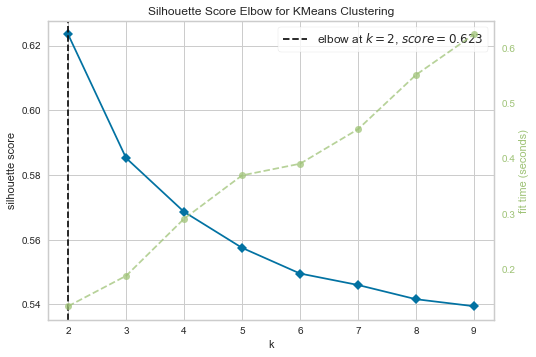

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

## Clustering with PCA and Kmeans -full table ( with social background)

In [ ]:
X=merge_encode_zero[['Religion', 'MPCE_MRP','Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables']]
X=X.sample(frac=.2, axis=0, random_state=0)
X.head()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)
df_pca = pca.transform(X)
df_pca.shape

In [ ]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

## CLUSTERING WITH KMEANS AND PCA

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(3) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)

k_centers = model.cluster_centers_

merge_encode_one['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)
merge['cluster'] = model.labels_



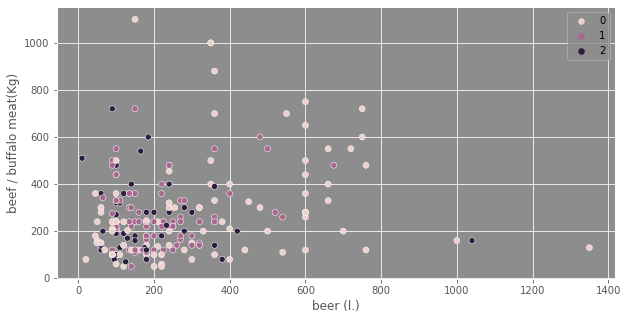

In [43]:

fig, ax = plt.subplots()
sns.scatterplot(data=merge, x='beer (l.)', y='beef / buffalo meat(Kg)', hue=y_pred, cmap='viridis', ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()



<AxesSubplot:xlabel='cluster', ylabel='Religion'>

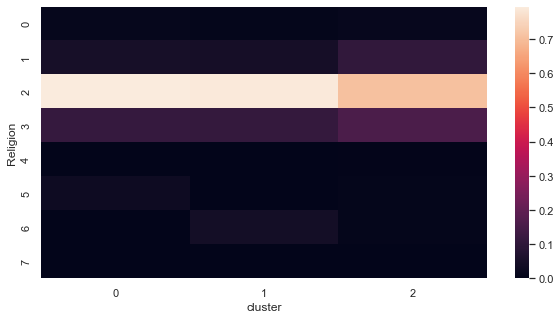

In [44]:

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(merge.Religion, merge.cluster, normalize='columns'))


In [45]:
merge.groupby(['cluster']) 

In [46]:
merge.groupby(['cluster'])['Social_Group'].value_counts()

cluster  Social_Group
0        0                8670
         1                6740
         3                3033
         2                2837
1        0               15644
         1               11788
         2                8031
         3                3721
2        0               15518
         1               13801
         3                6815
         2                4807
Name: Social_Group, dtype: int64

In [47]:
merge.groupby(['cluster', 'Religion', 'Social_Group' ]).size().sort_values(ascending=False)

cluster  Religion  Social_Group
1        2         0               12818
2        2         0               12128
                   1                9744
1        2         1                8638
0        2         0                7776
                                   ...  
1        7         2                   1
         5         0                   1
0        6         3                   1
         4         3                   1
         0         0                   1
Length: 83, dtype: int64

In [48]:
merge.cluster.value_counts()

2    40941
1    39184
0    21280
Name: cluster, dtype: int64

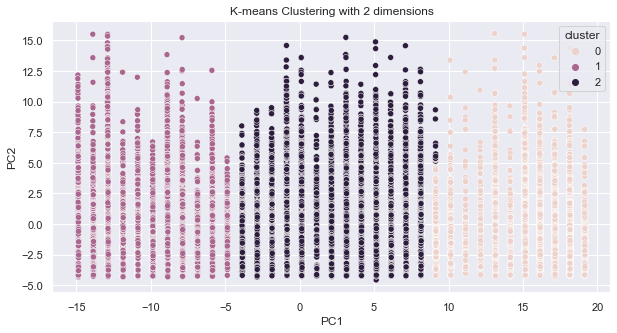

In [50]:
sns.scatterplot(x="PC1", y="PC2", hue=merge['cluster'], data=df_pca )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [630]:
kms = KMeans(n_clusters=3, random_state=1).fit(X)
X['Cluster'] = kms.labels_
X['Cluster Centroid D1'] = X['Cluster'].apply(lambda label: kms.cluster_centers_[label][0])
X['Cluster Centroid D2'] = X['Cluster'].apply(lambda label: kms.cluster_centers_[label][1])
X

#kms = KMeans(3) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
#kms.fit(merge_encode_one) #ON fIT 
#y_pred = kms.predict(merge_encode_one)

#k_centers = kms.cluster_centers_

#merge_encode_one['cluster'] = kms.labels_  #c'est y-pred ( la longue colonne)
#merge['cluster'] = kms.labels_

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,HH_Type_code,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat(Kg),beer (l.),chicken(Kg),"coffee, tea, juice",country liquor (l.),edible oil,eggs(no),"fish, prawn(Kg)",food non-veg,foreign/ refined liquor or wine (l.),fruits (dry),fruits(fresh),goat meat /mutton(Kg),packaged processed food,pan,pork(Kg),salt & sugar,spices,tobacco,toddy (l.),vegetables,cluster,Cluster,Cluster Centroid D1,Cluster Centroid D2
0,0,5,1,3,1,22,4,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
1,0,2,1,3,1,22,4,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
2,0,2,1,3,1,22,4,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
3,0,1,3,3,1,22,4,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,2,3.024001,0.009541
4,0,6,1,3,1,22,3,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,1.891521,0.022533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101400,1,3,3,0,0,26,6,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541
101401,1,3,3,0,0,26,7,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,1,2,3.024001,0.009541
101402,1,6,3,0,1,26,6,0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541
101403,1,3,3,0,1,26,7,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,2,3.024001,0.009541


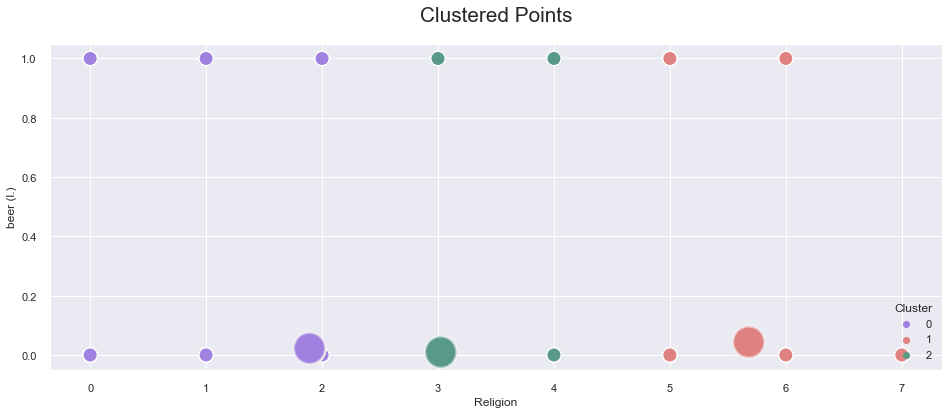

In [634]:

plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181", "#599988"]
ax = sns.scatterplot(data=merge_encode_one, x="Religion", y="beer (l.)", hue='Cluster', 
                     s=200, palette=colors, legend=True)
ax = sns.scatterplot(data=merge_encode_one, x="Cluster Centroid D1", y="Cluster Centroid D2", hue='Cluster', 
                     s=1000, palette=colors, legend=False, alpha=0.1)

plt.legend(loc='lower right', title='Cluster')
ax.set_title("Clustered Points", fontsize='xx-large', y=1.05);

In [637]:
merge_encode_one.groupby(['cluster'])['Religion'].value_counts()

cluster  Religion
0        2           28943
         3            6432
         1            4243
         0             569
         5             297
         6             270
         4             184
         7               2
1        2           31020
         3            4267
         1            1790
         6            1670
         0             303
         4             115
         5              18
         7               1
2        2           16932
         3            2395
         1            1013
         5             635
         0             217
         6              66
         4              23
Name: Religion, dtype: int64

## CLUSTERING WITH DBSCAN

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
dict_model={}
k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key="db"+str(k)
        dict_model[key] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

db1
DBSCAN(eps=0.01, min_samples=2)
number of clusters:  1168
db2
DBSCAN(eps=0.01, min_samples=3)
number of clusters:  755
db3
DBSCAN(eps=0.01, min_samples=4)
number of clusters:  531
db4
DBSCAN(eps=0.02, min_samples=2)
number of clusters:  1168
db5
DBSCAN(eps=0.02, min_samples=3)
number of clusters:  755
db6
DBSCAN(eps=0.02, min_samples=4)
number of clusters:  531
db7
DBSCAN(eps=0.03, min_samples=2)
number of clusters:  1168
db8
DBSCAN(eps=0.03, min_samples=3)
number of clusters:  755
db9
DBSCAN(eps=0.03, min_samples=4)
number of clusters:  531
db10
DBSCAN(eps=0.04, min_samples=2)
number of clusters:  1168
db11
DBSCAN(eps=0.04, min_samples=3)
number of clusters:  755
db12
DBSCAN(eps=0.04, min_samples=4)
number of clusters:  531


{'db1': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db2': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db3': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db4': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db5': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db6': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db7': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db8': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db9': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db10': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db11': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db12': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64)}

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])

In [ ]:
# fitting to splot

dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()

# GRAPH

In [ ]:
data['dbs_cluster'] = dbs.labels_
clusters = data['dbs_cluster'].reset_index()
clusters

In [ ]:
model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred



In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
k_centers = model.cluster_centers_

In [ ]:
data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)



In [ ]:
merge.groupby(['cluster'])['Religion'].value_counts()

In [ ]:
merge.cluster.value_counts()

In [ ]:
merge.groupby(['cluster'])['Social_Group'].value_counts()

In [ ]:

fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

In [ ]:
sns.scatterplot(x="Milk & Milk Products", y="MPCE_MRP", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
sns.scatterplot(x="beef / buffalo meat(Kg)", y="country liquor (l.)", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
sns.scatterplot(x="Social_Group", y="Sector", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotly_express as px
px.bar(data_frame = merge, x = 'Religion', y = 'State_code', color = 'cluster', orientation= "h")

In [ ]:
# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

In [ ]:
data['cluster'] = model.labels_

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

In [ ]:
data.groupby(['cluster']).mean()

model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred

np.unique(y_pred, return_counts=True)

k_centers = model.cluster_centers_

data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)


fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

data_encoder.head()

# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

data['cluster'] = model.labels_

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

data.groupby(['cluster']).mean()